In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')

from my_plot import set_size, setup_mpl_for_latex
setup_mpl_for_latex()

textwidth = 390  ###

In [2]:
response_variable_labels = {
    0: 'relative entropy, binning (RE-B)',
    1: 'mutual information, binning (MI-B)',
    2: 'transfer entropy, binning (TE-B)',
    3: 'relative entropy, symbolic approach (RE-S)',
    4: 'mutual information, symbolic approach (MI-S)',
    5: 'transfer entropy, symbolic approach (TE-S)',
    }
response_variable_short_labels = {
    0: 'RE-B',
    1: 'MI-B',
    2: 'TE-B',
    3: 'RE-S',
    4: 'MI-S',
    5: 'TE-S',
    }
# array indexes
BINNING_RELATIVE  = 0
BINNING_MUTUAL    = 1
BINNING_TRANSFER  = 2
SYMBOLIC_RELATIVE = 3
SYMBOLIC_MUTUAL   = 4
SYMBOLIC_TRANSFER = 5

MIN_TRIAL, MAX_TRIAL = 1, 1800
MIN_T, MAX_T = 0, 500

INDEX_MEANS, INDEX_STDEV = 0, 1

In [7]:
s = ['window_500', 'window_2', 'window_10', 'window_50', 'window_100', 'window_250']

data = []

trial = 151

path = r'C:\Users\Mike\Desktop\tmp\run_trial_data for supporting revisions'

for suffix in s:
    x = np.load(r'{}\replication_results_{}_1.design__{}.npy'.format(path, trial, suffix))
    data.append(x)

In [8]:

rv = 0

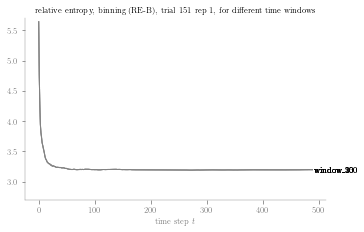

In [9]:
fig1, ax1 = plt.subplots(1, 1, figsize=set_size(textwidth))

t_max = 490
for i, window_data in enumerate(data):
    x = window_data[0:t_max, rv, 0]
    ax1.plot(x, marker='', color='grey', linewidth=1, alpha=0.5)
    ax1.annotate(s[i].replace('_', '\_'), (t_max+1.5, x[-1]), fontsize=8, ha='left', va='center', annotation_clip=False, color='black')
#     break ###

ax1.set_title(f'{response_variable_labels[rv]}, trial {trial} rep 1, for different time windows')
ax1.set_xlabel('time step $t$', color='grey')

# more decoration
ax1.spines['bottom'].set_color('grey')
ax1.spines['left'].set_color('grey')

ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')

ax1.set_ylim((2.7,5.7))

fig1.savefig(f'{response_variable_labels[rv]}_rolling_windows_trial_{trial}-1.pdf', format='pdf', bbox_inches='tight')

In [ ]:
x = np.load(r'{}\replication_raw_data_151_1.design.npy'.format(path))
i = np.arange(1,101)

fig1, ax1 = plt.subplots(1, 1, figsize=set_size(textwidth))

for i in range(100):
    xx = x[i, 0:420]
    ax1.plot(xx, marker='', color='grey', linewidth=0.25, alpha=0.5)

# more decoration
ax1.spines['bottom'].set_color('grey')
ax1.spines['left'].set_color('grey')

ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')

# fig1.savefig(f'{response_variable_labels[rv]}_rolling_windows_trial_151-1.pdf', format='pdf', bbox_inches='tight')

In [ ]:
np.unique(x[:,490]).size

In [ ]:
np.all(np.load(r'{}\replication_raw_data_1201_1.design.npy'.format(path))==np.load(r'{}\replication_raw_data_1_1.design.npy'.format(path)))